## Importing Libraries


In [1]:
from glob import glob
import pandas as pd
import numpy as np
from scipy.io import wavfile
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
from signal_processing_utilities import process_signal

plt.style.use("fast")

## Importing Data


In [2]:
data_dir = "../../data/"
data_dir_l = glob(data_dir + "*.wav")

In [3]:
sr, data = wavfile.read(data_dir_l[0])

## Manually Detrending the Raw Neural Data Time Series Signal


##### Plotting the time series signal


In [4]:
data_pd = pd.DataFrame(data, columns=["Amplitude"])
data_pd.head()

,Amplitude
0,-352
1,-416
2,-288
3,-288
4,-160


In [5]:
time_index = np.arange(0, (len(data_pd) / sr), step=1 / sr)
data_pd["Time [S]"] = time_index
data_pd = data_pd.set_index("Time [S]")

2.879199804867838e-30


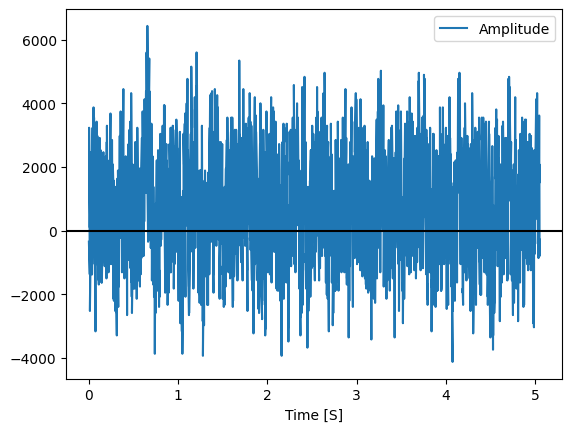

In [6]:
# Testing for stationarity
_, p, _, _, _, _ = adfuller(data_pd["Amplitude"])
print(p)
# The data is stationary with a constant mean and variance.
# The mean does not oscillate about the zero axis.
data_pd.plot()
plt.axhline(y=0, color="black")

In [7]:
data_pd.head()

,Amplitude
Time [S],
0.000000,-352
0.000051,-416
0.000102,-288
0.000154,-288
0.000205,-160


In [8]:
amplitude_t = np.arange(len(data_pd["Amplitude"]))

In [9]:
# Fitting an OLS linear model to the data and detrending using this method.
amplitude_model = sm.OLS(data_pd["Amplitude"], sm.add_constant(amplitude_t)).fit()

In [10]:
amplitude_trend = amplitude_model.predict(sm.add_constant(amplitude_t))

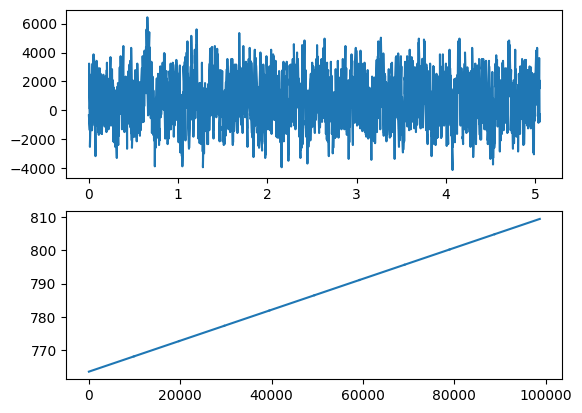

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=2)
ax[0].plot(data_pd["Amplitude"])
ax[1].plot(amplitude_trend)

In [12]:
len(amplitude_trend)

98699

In [13]:
amplitude_detrended = data_pd["Amplitude"] - amplitude_trend

In [14]:
data_pd["Amplitude"]

Time [S]
0.000000   -352
0.000051   -416
0.000102   -288
0.000154   -288
0.000205   -160
           ... 
5.053197   -288
5.053249   -352
5.053300    287
5.053351    223
5.053402   -288
Name: Amplitude, Length: 98699, dtype: int16

In [15]:
amplitude_trend

array([763.64615623, 763.64661924, 763.64708226, ..., 809.34384977,
       809.34431278, 809.3447758 ])

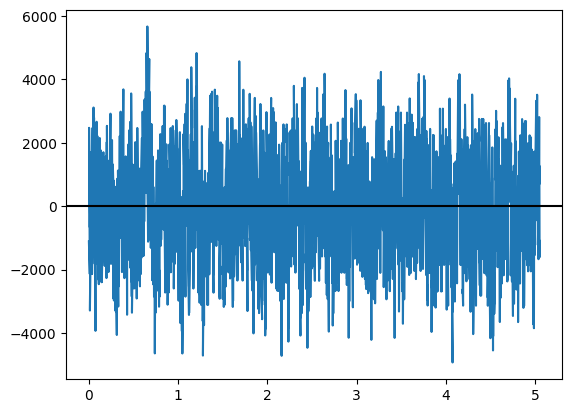

In [16]:
plt.plot(amplitude_detrended)
plt.axhline(y=0, color="black")

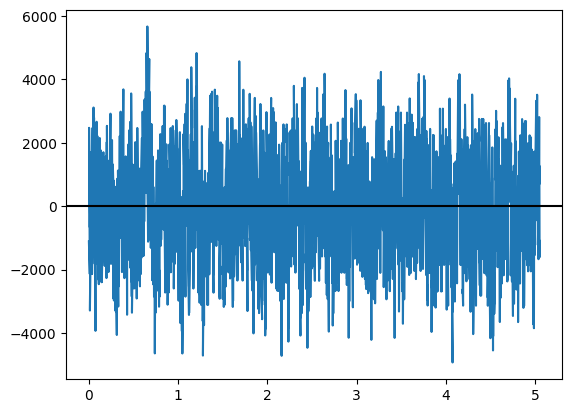

In [17]:
plt.plot(amplitude_detrended)
plt.axhline(y=0, color="black")

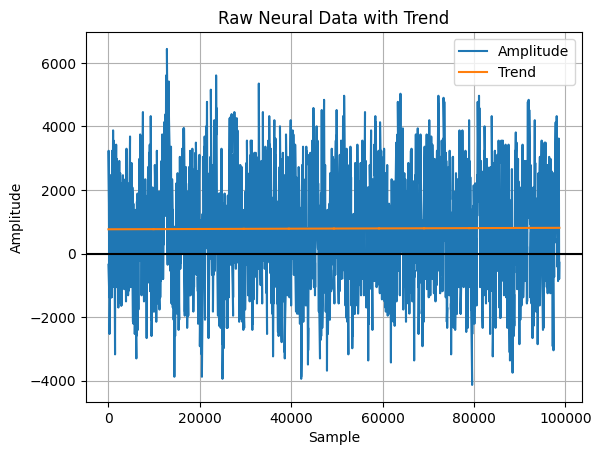

In [18]:
plt.plot(np.arange(len(data_pd["Amplitude"])), data_pd["Amplitude"], label="Amplitude")
plt.plot(amplitude_trend, label="Trend")
plt.axhline(y=0, color="black")
plt.legend()
plt.grid()
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Raw Neural Data with Trend")
plt.show()

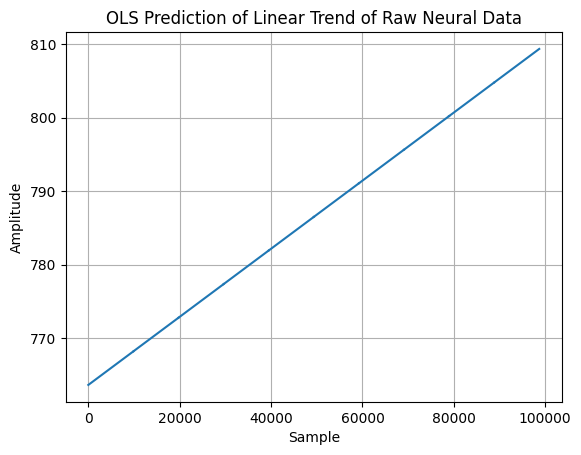

In [19]:
plt.plot(amplitude_trend)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("OLS Prediction of Linear Trend of Raw Neural Data")
plt.grid(True)
plt.show()

## Transform the Raw Neural Signal into a matrix form


In [20]:
import tensorflow as tf
import torch
import random

##### Converting Pandas DataFrame to PyTorch Tensor


In [21]:
# Creating dummy targets (float values)
targets_data = [random.random() for i in range(10)]

# Creating DataFrame from targets_data
targets_df = pd.DataFrame(data=targets_data)
targets_df.columns = ["targets"]

# Creating tensor from targets_df
torch_tensor = torch.tensor(targets_df["targets"].values)

# printing out result
print(torch_tensor)

tensor([0.0202, 0.6853, 0.6210, 0.9563, 0.4414, 0.5928, 0.2695, 0.5717, 0.8749,
        0.7055], dtype=torch.float64)


In [22]:
data_tensor = torch.tensor(data_pd["Amplitude"].values)

## Practicing Using CP tensor decomposition to impute missing values


### Defining the example dataset


In [23]:
y_1 = [
    0,
    0,
    0,
    0,
    0,
    2.7,
    7.74,
    6.24,
    8.32,
    8.75,
    11.46,
    8.94,
    11.68,
    12.62,
    15.13,
    13.9,
    15.83,
    16.12,
    18.04,
    19.58,
    18.9,
    22.14,
    22.9,
    23.5,
    24.9,
    24.32,
    25.88,
    26.06,
    27.73,
    29.53,
    29.31,
    30.6,
    31.31,
    32.15,
    33.33,
    34.99,
]
y_2 = [
    -1.12,
    1.23,
    3.66,
    3.74,
    3.81,
    4.11,
    5.25,
    8.69,
    8.05,
    8.36,
    10.19,
    13.1,
    12.12,
    13.62,
    14.3,
    14.65,
    14.86,
    16.65,
    17.79,
    19.59,
    20.84,
    21.93,
    22.29,
    23.89,
    23.25,
    26.25,
    26.51,
    26.7,
    28.49,
    28.92,
    31.13,
    32.52,
    34.19,
    31.6,
    32.56,
    34.5,
]
y_3 = [
    0.16,
    1.88,
    2.32,
    0.98,
    3.69,
    5.83,
    6.23,
    7.76,
    7.78,
    8.8,
    10.19,
    11.41,
    12.2,
    13.12,
    13.33,
    15.38,
    16.12,
    18.13,
    19.2,
    19.19,
    19.62,
    20.36,
    22.42,
    23.08,
    23.66,
    25.04,
    25.38,
    27.7,
    27.55,
    30.22,
    30.4,
    31.59,
    30.91,
    33.17,
    34.74,
    34.05,
]
y_4 = [
    -0.27,
    1.03,
    0.63,
    3.32,
    4.85,
    4.14,
    6.35,
    5.69,
    7.96,
    7.38,
    11.12,
    11.41,
    11.98,
    12.22,
    15.27,
    16.97,
    14.14,
    18.24,
    19.63,
    19.34,
    18.8,
    21.86,
    21.82,
    22.4,
    22.77,
    25.55,
    26.79,
    26.38,
    28.52,
    27.86,
    30.8,
    31.05,
    31.81,
    32.9,
    34.87,
    35.75,
]
y_5 = [
    0.53,
    1.14,
    2.08,
    3.62,
    4.23,
    5.68,
    5.69,
    4.57,
    9.04,
    11.19,
    10.44,
    10.9,
    11.86,
    12.88,
    14.02,
    13.88,
    15.48,
    16.0,
    18.25,
    18.7,
    20.5,
    20.83,
    22.99,
    23.21,
    26.19,
    23.1,
    25.35,
    27.9,
    30.53,
    28.75,
    30.04,
    30.77,
    33.33,
    32.71,
    34.68,
    34.68,
]

### Implementing CP Rank Decomposition


In [24]:
len(y_1)

36

In [25]:
from tensorly.decomposition import parafac

In [26]:
y_1_t = torch.tensor(y_1)

In [27]:
y_1_t

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  2.7000,  7.7400,  6.2400,
         8.3200,  8.7500, 11.4600,  8.9400, 11.6800, 12.6200, 15.1300, 13.9000,
        15.8300, 16.1200, 18.0400, 19.5800, 18.9000, 22.1400, 22.9000, 23.5000,
        24.9000, 24.3200, 25.8800, 26.0600, 27.7300, 29.5300, 29.3100, 30.6000,
        31.3100, 32.1500, 33.3300, 34.9900])

In [28]:
data_dir_l

['../../data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav',
 '../../data/2eef5d4d-93d1-4c0e-9d23-0989abaa34d0.wav',
 '../../data/fa2c5efb-cc0d-4292-ab99-91d345cf17d9.wav',
 '../../data/0458e9fc-6403-427e-afec-6a659104399a.wav',
 '../../data/30dee5fe-ded7-4978-9480-e40155e7b060.wav',
 '../../data/3953a230-d130-40e9-9dc4-068dda9bcef1.wav',
 '../../data/760ba446-aae7-4136-922c-9351c97504b8.wav',
 '../../data/2b1627e1-85a5-4155-ba52-4400e036b034.wav',
 '../../data/8559aba4-3f0b-45e3-add2-fcda2f9d586b.wav',
 '../../data/4036d06b-fc56-47ca-8a2f-d7e1c3f3d9a0.wav',
 '../../data/43758ea3-e5d2-4636-ad9c-ff5bfaa2914a.wav',
 '../../data/9397fd43-e0df-4c75-b27e-04c3ed2f0fb8.wav',
 '../../data/741e1978-11fb-4f4a-bf25-c43c239c226c.wav',
 '../../data/fea48b69-ccde-439e-9e7c-f06c72832c52.wav',
 '../../data/bc9115d8-2363-4159-ae41-295a9129a9aa.wav',
 '../../data/3ac7abb5-1e3e-4852-bfc8-e3f2875b765d.wav',
 '../../data/94c53803-f616-4c8e-b144-06d54ebfbfd1.wav',
 '../../data/b8b26cb7-1bf1-4156-a51d-7994525690f

## Reading the raw neural data into pandas dataframes


In [29]:
# Verifying that the sample rate is constant throughout all the data.
pd_df_list = []
sr_anomaly = False
for data_path in data_dir_l:
    sr, data = wavfile.read(data_path)
    if sr != 19531:
        print(f"Sample Rate is not 19531.")
        print(f"Sample Rate: {sr}. ")
        print(f"Data File Path: {data}. ")
        sr_anomaly = True
    pd_df_list.append(data)
    
if sr_anomaly:
    print(f"Sample Rate is not 19531.")
else:
    print("Sample Rate is consistently 19531.")

Sample Rate is consistently 19531.


In [30]:
pd_df_list[0]

array([-352, -416, -288, ...,  287,  223, -288], dtype=int16)

In [31]:
len(pd_df_list)

743

In [32]:
# Testing how long it takes to read the data into an array
start_time = time.time_ns()
sr, data = wavfile.read(data_dir_l[0])
stop_time = time.time_ns()

process_signal.print_time_each_function_takes_to_complete_processing(
    start_time=start_time, 
    stop_time=stop_time, 
    executed_line="sr, data = wavfile.read(data_dir_l[0])"
)


Executed Line: sr, data = wavfile.read(data_dir_l[0])...
Time Δ Nanoseconds: 560000
Time Δ Microseconds: 560.0
Time Δ Milliseconds: 0.56
Time Δ Seconds: 0.00056


